<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/04%20Clasificacion_Agrupamiento/2%20Modelos%20Probabilistas/Notebooks/Inferencia_probabilista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="400" src="../img/AI_network.jpg"/> Inferencia Probabilista y Enfoque Bayesiano en ML</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas</u>:
* Flach, Peter (2012). _Machine Learning: The Art and Science of Algorithms that Make Sense of Data_. Cambridge University Press.
* Bishop, Christopher M. (2006). _Pattern recognition and machine learning_. New York. Springer.
* Mitchell, Tom (1997). _Machine Learning_. McGraw-Hill, New York.

## &#9991; <u>Inferencia probabilista</u>

### Ejemplo introductorio: Cajas con Frutas
Supongamos que tenemos dos cajas, una caja roja que contiene 2 Manzanas y 6 Duraznos, y una caja azul que contiene 3 Manzanas y 1 Durazno.

<img src="../img/peras_naranjas.jpg" width=200/>

Experimento(s):
* <u>Elegimos una caja al azar</u> y <u>sacamos una fruta al azar</u>.
* Habiendo observado qué fruta es, la volvemos a colocar en la caja de donde salió (muestreo con reemplazo).
* Hacemos esto muchas veces; i.e. corremos el experimento varias veces (_trials_). 

Condiciones de partida (supuestos):
* Supongamos que en este proceso tomamos la caja <b>roja 40%</b> de las veces y la caja <b>azúl 60%</b>.
* Supongamos también que al devolver la fruta elegida al azar, cualquier otra fruta es igualmente probable de ser elegida la próxima vez (muestreo independiente).

### Formalización del Experimento y sus Resultados:

#### Variable aleatoria, evento, distribución de probabilidad, valor de probabilidad
* **La identidad de la caja** es una **_Variable Aleatoria_** (VA) que llamaremos $C$. Esta VA tiene **dos valores posibles**: $r$ (cuando se elige la caja roja) y $a$ (cuando elegimos la caja azúl).
* La identidad de la fruta es una VA ($F$), cuyos valores posibles son $m$ y $d$.
* Llamaremos un **_Evento_** el **resultado** de "elegir una caja al azar".
* De esta forma, tenemos dos eventos posibles respecto de la primera parte del experimento: $C=r$ o $C=a$.
* Llamaremos $P(C)$ la **distribución de probablidad** de $C$ y $p(C=x)$ el valor de probabilidad de que $C=x$. 
* Del ejemplo tenemos: $p(C=r)=4/10$ y $p(C=a)=6/10$; las respectivas proporciones de cada evento. Por definición los valores de probabilidad se encuentran en el intervalo $[0,1]$.
* Para simplificar la notación escribiremos: $p(r)=0.4$ o $p(a)=0.6$.
* Nota la diferencia entre el valor que puede tomar la VA ($r$ o $a$) y el valor de probabilidad de cada valor posible de la variable ($p(r)$ o $p(a)$).
* Si los eventos son mutuamente excluyentes e incluyen todos los resultados posibles (como es el caso), entonces la suma de sus probabilidades es $1$: $p(r)+p(a)=1$.
* A partir de aquí, nos podemos hacer varias preguntas. Por ejemplo, ¿Cuál es la probabilidad de elegir una Manzana? o ¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?
* Para responder este tipo de preguntas, necesitamos utilizar las **_reglas de inferencia_** de la Teoría de Probabilidad.

  ### Regla del Producto y Regla de la Suma

#### **Ilustración gráfica**.

* Supongamos dos VA $X$ y $Y$. Supongamos además que $X$ tiene $i=1,\ldots,M$ valores posibles y $Y$ tiene $j=1,\ldots,L$ valores posibles, que denominaremos $x_i$ y $y_j$ respectivamente.
* Supongamos que corremos el experimento $N$ veces (trials) y que en cada corrida muestreamos el valor de $X$ y de $Y$. 
* Sea $n_{ij}$ el **número de veces** en que $X=x_i$ y $Y=y_j$.
* Sea $c_i$ el número de veces en que $X=x_i$ (independientemente de cuanto valga $Y$).
* Sea $r_j$ el número de veces en que $Y=y_j$ (independientemente de cuanto valga $X$).

<img src="../img/probas_graficas.jpg" width=300/>
<em><center>Ilustración de dos VA $X$ y $Y$: $X$ puede tomar 5 valores posibles y $Y$ 3. </center></em>

<u>Probabilidad Conjunta</u>

Es la probabilidad de que $X=x_i$ y $Y=y_j$ de manera simultánea (conjuntamente). Se escribe: $p(X=x_i,Y=y_j)$ y está dada por la proporción de veces en que ocurre esta conjunción (celda $(i,j)$) respecto del total de observaciones. 

<center>$p(x_i,y_j)=\frac{n_{ij}}{N}$ &emsp;&emsp;&emsp;&emsp; (1)</center>

<u>Probabilidad Marginal (Regla de la Suma)</u>

Es la probabilidad de que $X=x_i$ de manera aislada (independientemente del valor de $Y$). Se escribe: $p(X=x_i)$ y está dada por la proporción del total de veces en que $X=x_i$ respecto del total de observaciones. 

<center>$p(x_i)=\frac{c_{i}}{N}$ &emsp;&emsp;&emsp;&emsp; (2)</center>

&#9758; Puesto que el número de instancias $c_i$ es el valor total de instancias en la columna $i$, tenemos que $c_i=\sum n_{ij}$. Por lo tanto, de (1) y (2) tenemos:
$$
p(X=x_i)=\sum_{j=1}^{L} p(X=x_i,Y=y_j) \;\;\;\;\;\;(3)
$$

<u>Probabilidad Condicional</u>

Si consideramos sólo las instancias en que $X=x_i$, la fracción de estas instancias en las que $Y=y_j$ se escribe: $p(Y=y_j|X=x_i)$ y se le llama probabilidad condicional de $Y=y_j$ dado que $X=x_i$. Es la fracción de puntos que están en la columna $c_i$ que caen en la celda $(i,j)$: 

<center>$p(y_j|x_i)=\frac{n_{ij}}{c_{i}}$ &emsp;&emsp;&emsp;&emsp; (4)</center>

#### **Regla del Producto:**

&#9758; De (1), (2) y (4) tenemos la siguiente relación:

$$
p(X=x_i,Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i}\cdot\frac{c_{i}}{N} = p(Y=y_j|X=x_i)p(X=x_i) \;\;\;\;\;\;(5)
$$

$$
P(X,Y) = P(Y|X)P(X) \;\;\;\;\;\;(6)
$$

#### **Regla de la Suma:**

$$
p(X)=\sum_{Y} P(X,Y) \;\;\;\;\;\;(7)
$$


&#9758; Estas expresiones se refieren a distribuciones de probabilidad **discreta**. Debes tomar en cuenta que se trata de Tablas, donde se van llenando los valores de probabilidad para cada valor de $x_i$ y $y_j$. 

Para nuestro ejemplo de Cajas ($X$) y Frutas ($Y$), las Tablas de distribución tendrían una aspecto similar a estos:
<table width="90%">
    <tr>
        <td valign="top">
            <table width="40%">
              <tr>
                <th> $X$</th>
                <th><p style="text-align:center;"> $P(X)$</p></th>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r$</p></td>
                <td><p style="text-align:center;">$p(r)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a$</p></td>
                <td><p style="text-align:center;">$p(a)$</p></td>
              </tr>
            </table>
        </td>
        <td valign="top">
            <table >
              <tr>
                <th> $X, Y$</th>
                <th><p style="text-align:center;"> $P(X,Y)$</p></th>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r,m$</p></td>
                <td><p style="text-align:center;">$p(r,m)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r,d$</p></td>
                <td><p style="text-align:center;">$p(r,d)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a,m$</p></td>
                <td><p style="text-align:center;">$p(a,m)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a,d$</p></td>
                <td><p style="text-align:center;">$p(a,d)$</p></td>
              </tr>
            </table>
        </td>
        <td valign="top">
            <table >
              <tr>
                <td style="height:1px;"> &nbsp;</td>
                <td colspan="2"><p style="text-align:center;">$P$($Y$|$X$)</p></td>
              </tr>
              <tr>
                <td>$X$</td>
                <td><p style="text-align:center;">$m$</p></td>
                <td><p style="text-align:center;">$d$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r$</p></td>
                <td><p style="text-align:center;">$p(m|r)$</p></td>
                <td><p style="text-align:center;">$p(d|r)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a$</p></td>
                <td><p style="text-align:center;">$p(m|a)$</p></td>
                <td><p style="text-align:center;">$p(d|a)$</p></td>
              </tr>
            </table>        
        </td>
    </tr>
</table>



### Teorema de Bayes

De la regla del producto podemos observar que:

$$
P(X,Y) = P(Y|X)P(X) = P(X|Y)P(Y) \;\;\;\;\;\;(8)
$$

Despejando para $P(Y|X)$ tenemos el **Teorema de Bayes**:

$$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} \;\;\;\;\;\;(9)
$$


### &#9998; **Ejercicios-Reglas de la Inferencia Probabilista**

Aplicando las ecuaciones (6) a (9) responde a las siguientes preguntas para nuestro ejemplo de Manzanas y Duraznos:

<ol>
    <li>¿Cuál es la probabilidad de elegir una Manzana?</li>
    <li>¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?</li>
</ol>

Representemos $P(X)$, la distribución de X (el color de la caja)

In [1]:
import numpy as np
import pandas as pd

#PX={'r':4/10, 'a':6/10}. los datos:
data={'p':[4/10,6/10]}

#construimos el DF
PX=pd.DataFrame(data,index=['r','a'])

#Cambiamos el titulo del indice
PX.index.names = ['X']
PX.columns.names = ['P(X)']

print('p(X=r) = {0}; p(X=a) = {1}'.format(PX['p']['r'],PX['p']['a']))
PX


p(X=r) = 0.4; p(X=a) = 0.6


P(X),p
X,
r,0.4
a,0.6


&#9998; **Calcula $P(Y|X)$. ¿Qué representa esta distribución para nuestro ejemplo?**

In [2]:
# TIP: de los datos de partida, encuentra:
# pm_r,pm_a
# pd_r,pd_a

#luego construye el diccionario 'data'
data={}

#construimos el DF
PY_X=pd.DataFrame(data,index=["r", "a"])
PY_X.index.names = ['X']
PY_X.columns.names = ['P(Y|X)']
PY_X

P(Y|X)
X
r
a


&#9998; **¿Cuál es la probabilidad de elegir una Manzana?**

* ¿Cómo se representa la probabilidad de esta pregunta?
* Calcúlala
* Proporciona la distribución completa $P(Y)$

&#9998; **¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?**

* ¿Cómo se representa la probabilidad de esta pregunta? 
* Calcúlala
* Proporciona la distribución completa

___

###  I.4 Inferencia Continua

En el caso de VA continuas, el cálculo de probabilidades pasa por la integración de la función de **densidad de probabilidad**. Por ejemplo, si $x$ es una VA continua, que toma valores en el intervalo $(a,b)$, y si su función de densidad probabilidad es $f(x)$, entonces:

$$
p(x\in(a,b))=\int_a^b f(x)\,\textrm{d}x
$$

$$
p(x) \geq 0
$$

$$
\int_{-\infty}^{\infty} f(x)\,\textrm{d}x = 1
$$

<img src="../img/densidad_probabilidad.jpg" width="50%"/>

Si tenemos dos VA continuas $x$ y $y$ y funciones de densidad de probabilidad marginal $p(x)$, conjunta $p(x,y)$ y condicional $p(y|x)$, las reglas del producto y de la suma tiene la misma forma que vimos antes:

#### **Regla del Producto:**

$$
p(x,y) = p(y|x)p(x) \;\;\;\;\;\;(10)
$$

#### **Regla de la Suma:**

$$
p(x)=\int p(x,y)\,\textrm{d}y \;\;\;\;\;\;(11)
$$

&#9998; **Utiliza las reglas del producto, de la suma y el teorema de Bayes para encontrar la expresión que se pide, dada una distribución conjunta proporcionada al inicio:**

NOTA: Las variables discretas están en _MAYÚSCULAS_ y las continuas en _minúsculas_.

* $p(A,B,C)$ ; $p(B)$ &emsp; &emsp; &emsp; $\rightarrow^{resp.} p(B)=\sum_A \sum_C p(ABC)$
* $p(X,B,D)$ ; $p(XB)$ &emsp; &emsp; $\rightarrow^{resp.} $ 
* $p(x,y)$ ; $p(y|x)$ &emsp; &emsp; &emsp; &nbsp; $  \rightarrow^{resp.} $
* $p(x,\mu|D)$ ; $p(x|D)$ &emsp; &emsp; $  \rightarrow^{resp.} $
* $p(H,D|\pi)$ ; $p(D|H\pi)$ &emsp;  $  \rightarrow^{resp.} $
* $p(x,y,E,A)$ ; $p(x,y)$ &emsp; &nbsp;   $  \rightarrow^{resp.} $
* $p(x,y,E|A)$ ; $p(x|E,A)$ &nbsp;  $  \rightarrow^{resp.} $

___

## &#9991; <u>Enfoque Bayesiano: inferencia con incertidumbre</u>

* El ejemplo la caja con frutas, es un clásico ejemplo de cómo se utilizan las reglas de inferencia probabilista, bajo un **enfoque frecuentista**. 
* En algunas ocasiones es prácticamente imposible realizar un conteo de ciertos fenómenos o situaciones reales. Pensemos en la situación actual de la pandemia covid19. ¿Habrá desaparecido el riesgo de contagio en México en el 2021? Esta es una pregunta sobre la que no tenemos forma de repetir experimentos y calcular una probabilidad en la misma forma que en el ejemplo de las frutas. 
* Aún así, es posible tener una estimación de la velocidad de contagio y de la disminución del número de personas infectadas hasta ahora. Con ello, podríamos hacernos una idea (**una creencia** o **hipótesis**) sobre la respuesta a la pregunta.
* Esta  **creencia a priori**, sin embargo, tendría que **modificarse** conforme vayamos teniendo **nueva evidencia**¨sobre el comportamiento de los contagios.
* La evaluación de estos aspectos nos llevaría a **tomar decisiones**, cuyos efectos deberíamos ser capaces de observar para validar nuestras hipótesis.  
* Ante estas circunstancias, es deseable tener una forma de **medir la incertidumbre** alrededor de nuestras hipótesis, y hacer revisiones de esta incertidumbre a la luz de nueva información.
* Esto se logra gracias a la elegante interpretación de la probabilidad bayesiana.

### Re-interpretación del Teorema de Bayes

<img src="../img/enfoque_bayesiano.jpg" width="80%"/>

&#128214; <u>Orígenes del bayesianismo</u>:
<br>
<ul>
    <li> Biografía de <a href="https://es.wikipedia.org/wiki/Thomas_Bayes"> Thomas Bayes</a> en Wikipedia</li>
    <li> <a href="https://en.wikipedia.org/wiki/Cox%27s_theorem"> Cox's Theorem</a> en Wikipedia</li>
    <li> Cox, R. T. (1946). "Probability, Frequency and Reasonable Expectation". American Journal of Physics. 14: 1–10. doi:<a href="https://aapt.scitation.org/doi/10.1119/1.1990764">10.1119/1.1990764</a>. </li>
    <li>Cox, R. T. (1961). The Algebra of Probable Inference. Baltimore, MD: Johns Hopkins University Press. </li>
    <li><a href="https://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes">Jaynes, E.T.</a> (2003). Probability Theory - The Logic of Science.  Cambridge University Press. doi: <a href="https://www.cambridge.org/core/books/probability-theory/9CA08E224FF30123304E6D8935CF1A99">10.1017/CBO9780511790423</a></li>
</ul>



&#128214; <u>Algunas herramientas y productos sobre inferencia probabilística y bayesiana</u>
* [Repositorio de Kevin Murphy](https://www.cs.ubc.ca/~murphyk/Software/bnsoft.html), actualizado hasta el 16 de Junio de 2014.
* [PyMC3](https://docs.pymc.io/) software libre de programación probabilística en Python.
* [Stan](https://mc-stan.org/) es una plataforma open-source para el modelado estadístico y el cálculo estadístico de alto rendimiento. Cuenta con interfaces para R, Python, shell, MATLAB, Julia y Stata, y corre en plataformas Linux, Mac y Windows.
* [Netica](https://www.norsys.com/) es una herramienta comercial para modelar redes bayesianas.
* [Infer.NET](https://www.microsoft.com/en-us/research/project/infernet/) es una herramienta en desarrollo de Microsoft Research que combina modelos gráficos con programación probabilista.
* [Hugin expert](https://www.hugin.com/) es otra herramienta comercial para desarrollar redes bayesianas. Una de las primeras disponibles en el mercado hace más de 20 años.
* [BUGS (Bayesian inference Using Gibbs Sampling)](http://www.openbugs.net/w/FrontPage): un proyecto muy activo descrito en _The BUGS book: a practical introduction to Bayesian analysis_ (Lunn et al. 2012). Una introducción al libro puede encontrarse en este [Review](https://pdfs.semanticscholar.org/542e/05cbeeb2674827c5b99e0fb87d37bc7eb3c7.pdf?_ga=2.157056635.171412260.1590004611-1055786045.1581021538).
* [ProBT](https://team.inria.fr/e-motion/en/software/) es un motor de inferencia y una herramienta de cómputo desarrollada por [ProBayes](https://www.probayes.com/notre-histoire/) para diseñar e implementar el paradigma de la [_Programación Bayesiana_](https://en.wikipedia.org/wiki/Bayesian_programming), que esencialmente tiene sus fundamentos en el enfoque de [Edwin T. Jaynes](https://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes), quien veía a la Teoría de la Probabilidad como una extensión de la Lógica.

___

## &#9991; <u>El problema de Clasificación desde la perspectiva Bayesiana</u>

* La probabilidad conjunta $p(\textrm{x}, \textrm{t})$ contiene toda la información respecto de estas variables y **describe la incertidumbre** asociada a ellas.
* Determinar $p(\textrm{x}, \textrm{t})$ de un conjunto de **datos de entrenamiento** es un ejemplo de inferencia, y en general un problema muy difícil.
* En situaciones prácticas, debemos hacer una **predicción** respecto del valor de $\textrm{t}$, o tener una idea de su valor con el fin de **tomar una decisión**. 
* Generalmente la decisión consiste, en el caso de la **Clasificación**, en **asignar un nuevo dato a una de las clases**, y en el caso de la **Regresión**, **hacer corresponder a una nueva variable de entrada el valor numérico "óptimo"**. 

&#9758; Desde un enfoque Bayesiano, el problema de Clasificación se puede describir de la siguiente forma:

$$
p(\mathcal{C}_k|\textrm{x}) = \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{p(\textrm{x})}= \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{\sum_k p(\textrm{x},\mathcal{C}_k)}=\frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{\sum_k p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}\;\;\;\;\;\;\;(12)
$$


* El problema de la decisión puede resolverse de tres maneras posibles:
<ol>
    <li> Primero resuelve el problema de inferencia de determinar las distribuciones de probabilidad condicional a las clases $p(\textrm{x}|\mathcal{C}_k)$ para cada clase $\mathcal{C}_k$ individualmente. Además, infiere las probabilidades sobre el <i>a-priori</i> de cada clase $p(\mathcal{C}_k)$. Luego, usa el teorema de Bayes (12) para encontrar los <i>a-posterioris</i> $p(\mathcal{C}_k|\textrm{x})$. Como es habitual, el denominador puede calcularse de la siguiente forma:<br>&nbsp;
        $$
        p(\textrm{x}) = \sum_k p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)\;\;\;\;\;\;\;(13)
        $$     
        Habiendo encontrado las distribuciones <i>a-posteriori</i>, usa el criterio de <b>MAP</b> (<i>Máximo A Posteriori</i>) para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que explícita o implícitamente modelan las distribuciones de entradas y salidas se llaman <b><i>modelos generativos</i></b>, ya que se pueden generar datos sintéticos muestreándolos. <br> &#9758; P.Ej. <i>Redes Bayesianas; Markov Random Fields; Modelos Ocultos de Markov (HMM's)</i></li>
    <li> Primero resuelve el problema de inferencia de las distribuciones <i>a-posteriori</i> $p(\mathcal{C}_k|\textrm{x})$, y después usa el criterio de MAP para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que modelan directamente las distribuciones <i>a-posteriori</i> se llaman  <b><i>modelos discriminativos</i></b> <br> &#9758; P.Ej. <i>Regresión Logística; Conditional Random Fields (CRF's)</i></li>
    <li> Encuentra una función $f(\textrm{x})$, llamada <b><i>función discriminante</i></b>, que mapea cada entrada $\textrm{x}$ directamente a una clase. Por ejemplo, en el caso de la clasificación binaria, $f=0$ representa la clase $\mathcal{C}_1$ y $f=1$ la clase $\mathcal{C}_2$. En este caso, las probabilidades no se utilizan. <br> &#9758; P.Ej. <i>SVM;RRNN.</i></li>

### En resumen:
* Entrenar un clasificador involucra el cálculo de $f: x \to y$, es decir: $P(y|x)$. En varios textos $y\equiv t$, $t$ de _target_ (objetivo).
* Clasificadores Generativos:
  - Supón una forma funcional para $P(y)$ (_prior_) y para $P(x|y)$ (_likelyhood_). Usualmente el _prior_ y el _posterior_ tienen la misma forma funcional (distribuciones conjugadas) y el _prior_ se elige como un **prior conjugado** de la _likelyhood_.
  - Estima los parámetros de $P(x|y)$, y de $P(y)$ directamente de los datos de entrenamiento o por conocimiento a priori.
  - Usa la Regla de Bayes para calcular $P(y|x)$.

* Clasificadores Discriminativos:
   - Supón una forma funcional para $P(y|x)$
   - Estima los parámetros de $P(y|x)$ (usualmente por _Máximo de Verosimilitud_), directamente de los datos de entrenamiento o por conocimiento a priori.

___

## &#9991; Aprendizaje: Ajuste de un Modelo

* En el caso en que se desee implementar un clasificador mediante un modelo generativo, la sección anterior sugiere modelar los datos como distribuciones de probabilidad.
* Un supuesto importante es considerar que los datos son independientes (suposición _ingenua_/_naïve_) e idénticamente distribuidos (_iid_).
* En este curso vamos a usar distribuciones paramétricas (e.g. Binomial o Gaussiana), ya que están gobernadas por un número pequeño de parámetros y se utilizan muy ampliamente en la literatura.
* EL **aprendizaje** consiste en ajustar un modelo a los datos.
* Para ajustar los parámetros de estos modelos, vamos a seguir dos principios: el de **Máximo de Verosimilitud** (frecuentista) o el **Bayesiano** (calcular el _posterior_, multiplicando de manera recursiva el _prior_ con el _likelihood_ conforme se observan datos).

## Ajuste por Máximo de Verosimilitud (_Maximum Likelihood_) 

#### Ejemplo: Ajuste de una distribución marginal

* Supongamos que tenemos datos uni-dimensionales, cuyo origen desconocemos... 

In [3]:
import scipy.stats as stats

def datos_misteriosos(n):
    data = stats.bernoulli.rvs(0.5, size=n[-1])
    return data

#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]
D=datos_misteriosos(n_trials)

print(D)

[0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 0 0 0 

* Suponiendo una distribución Gaussiana, ajustemos este modelo a nuestros datos:  

La Gaussiana uni-dimensional:
$$
\displaystyle p(x|\mu,\sigma^2)=\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{2\pi\sigma^2}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}\hspace{7em}(14)
$$

La Gaussiana multidimensional:
$$
\displaystyle p(\textrm{x}|\mathbf{\mu},\Sigma)=\mathcal{N}(\textrm{x}|\mathbf{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(\textrm{x}-\mu)^\textrm{T}\Sigma^{-1}(\textrm{x}-\mu)\right\}\hspace{3em}(15)
$$

* Para ello vamos a maximizar la función de verosimilitud (_likelyhood_), dadas N observaciones:

$$
\displaystyle p(\textrm{x}|\mu,\sigma^2)=\prod_{n=1}^{N}\mathcal{N}(x_n|\mu,\sigma^2)\hspace{3em}(16)
$$

* En estos casos es común calcular el $\log$ del likelyhood:

$$
\displaystyle \ln p(\textrm{x}|\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2 -\frac{N}{2}\ln \sigma^2 -\frac{N}{2}\ln (2\pi)\hspace{3em}(17)
$$

&#9758; Maximizando (17) con respecto a $\mu$, obtenemos:
$$
\displaystyle \frac{\partial}{\partial \mu}\ln p(\textrm{x}|\mu,\sigma^2)=0 \implies -\frac{1}{2\sigma^2}\left(\sum_{n=1}^N 2(x_n-\mu)\right)=0\implies\sum_{n=1}^N x_n-\sum_{n=1}^N\mu=0 
$$
$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n \hspace{3em}(18)
$$

&#9758; Maximizando (17) con respecto a $\sigma^2$, obtenemos:

$$
\displaystyle \sigma^2_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N (x_n-\mu_{\textrm{ML}})^2
$$

&#9998; **Define una función que calcule los parámetros $\mu_{\textrm{ML}}$ y $\sigma^2$ para nuestros datos $D$, <u>en función del número de experimentos</u>. Compara estos cálculos contra los que te da numpy.**

In [4]:
#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]

for n in n_trials:
    d=D[:n]
    # TU CODIGO AQUI
    

* Un problema con la estimación de los parámetros por ML es el _**overfitting**_ : la estimación "se apega" a los datos.
* Otro problema es el sesgo en la varianza.

<img src="../img/ML_varianza.jpg" width="100%">

___

## Máximo de verosimilitud y Regresión Lineal

* Recordemos que la formulación del problema en regresión lineal es encontrar $\textrm{w}$ tal que
$$
t=y(\textrm{x},\textrm{w})+\epsilon\hspace{4em}(19)
$$
* Nota que los parámetros $\textrm{w}$ son las variables del modelo.
* Desde el punto de vista del Machine Learning, el problema del aprendizaje se podría formular de la siguiente forma:

$$
p(\textrm{w}|t,\textrm{x})\propto p(t|\textrm{w},\textrm{x})p(\textrm{w}|\textrm{x})
$$
* De esta forma $(19)\equiv p(t|\textrm{w},\textrm{x})$, es decir, la _likelyhood_.

* Suponiendo ruido gaussiano, esta _likelyhood_ se puede expresar como:

$$
p(t|\textrm{x},\textrm{w},\beta)=\mathcal{N}(t|y(\textrm{x},\textrm{w}),\beta^{-1})
$$
donde $\beta=1/\sigma^2$ se le conoce como la precisión. 
* Para un conjunto de observaciones $X:=\{\textrm{x}_1,\ldots,\textrm{x}_N\}$ con respectivos objetivos $\mathbf{t}:=\{t_1,\ldots,t_n\}$, tenemos que 

$$
\displaystyle p(\mathbf{t}|X,\textrm{w},\beta)=\prod_{n=1}^N\mathcal{N}(t_n|\textrm{w}^\textrm{T}\phi(\textrm{x}_n),\beta^{-1}) \hspace{3em}(20)
$$
donde $\phi(\cdot)$ es una función base cualquiera. 
* Sustituyendo (14) en (20):

$$
\displaystyle p(\mathbf{t}|X,\textrm{w},\beta)=\prod_{n=1}^N\frac{\beta}{2\pi}\exp\left\{-\frac{\beta}{2}\{t_n-\textrm{w}^\textrm{T}\phi(\textrm{x}_n)\}^2\right\}
$$

* Nota que en problemas de regresión o clasificación supervisada, no estamos buscando modelar la distribución de los datos de entrada. Así, $\textrm{x}$ siempre aparecerá en el conjunto de variables condicionales. 
* De esta forma podemos omitir $X$ en las expresiones subsecuentes solo para fines de legibilidad del texto.
* Tomando el logaritmo de la función de verosimilitud:
$$
\begin{array}
\;\ln p(\mathbf{t}|\textrm{w},\beta)&=&\sum_{n=1}^{N} \ln\mathcal{N}(t|\textrm{w}^\textrm{T}\phi(\textrm{x}_n),\beta^{-1})\\
                                    &=& \frac{N}{2}\ln\beta-\frac{N}{2}\ln(2\pi)-\beta E_d(\textrm{w})
\end{array}
$$
donde $E_D(\textrm{w})$ es la función de error de suma de cuadrados definida como:
$$
E_D(\textrm{w})=\frac{1}{2}\sum_{n=1}^N \{t_n - \textrm{w}^\textrm{T}\phi(\textrm{x}_n)\}^2
$$
* El máximo de verosimilitud (_maximum likelyhood_) se calcula mediante el gradiente e igualando a $0$.
* Derivando con respecto a $\textrm{w}$ tenemos:

$$
\nabla_\textrm{w} \ln p(\mathbf{t}|\textrm{w},\beta)=\sum_{n=1}^N \{t_n - \textrm{w}^\textrm{T}\phi(\textrm{x}_n)\}\phi(\textrm{x}_n)^\textrm{T}.\hspace{4em}(21)
$$
Igualando a $0$:
$$
0=\sum_{n=1}^N t_n\phi(\textrm{x}_n)^\textrm{T} - \textrm{w}^\textrm{T}\left(\sum_{n=1}^N \phi(\textrm{x}_n)\phi(\textrm{x}_n)^\textrm{T}\right)
$$
* Finalmente:
$$
\textrm{w}_{ML}=\left(\Phi^\textrm{T}\Phi\right)^{-1}\Phi^\textrm{T}\mathbf{t}
$$
que es la fórmula que involucra la _pseudo inversa de Moore-Penrose_.
* **La fórmula de OLS es producto del cálculo del máximo de la función de verosimilitud del problema de aprendizaje estadístico.**

___

## Ajuste Bayesiano de un modelo generativo

* Como hemos dicho, el enfoque Bayesiano consiste en tener una "idea" de cuál sería la distribución a priori (modelo a priori) de los datos, para ir calculando la distribución a posteriori mediante el _prior_ y el _likelyhood_, conforme vamos teniendo datos nuevos. 

* En en este contexto, si suponemos que la distribución a posteriori tiene una cierta forma funcional, se utilizan _**a prioris conjugados**_, que son modelos que permiten calcular a posterioris con esa forma funcional. 
* En este caso, el ajuste del modelo implica calcular el _posterior_ 

$$
\underbrace{p(\theta|x)}_{posterior}\propto \overbrace{p(x|\theta)}^{likelyhood}\underbrace{p(\theta)}_{prior}
$$
y para el _prior_, se elige una distribución conjugada del _likelyhood_.

___
* Podríamos, como hicimos más arriba calcular el likelyhood directamente.
* Por ejemplo, supongamos que elegimos una distribución de Bernoulli para nuestros "datos misteriosos".

$$
p(x|\theta)=\textrm{Bern}(x|\mu)=\mu^x(1-\mu)^{1-x}
$$

Dado $N$ observaciones: $D=\{x_1,\ldots,x_N\}$, que suponemos estadísticamente independientes, la expresión del _likelyhood_ sería:

$$
\displaystyle p(D|\mu)=\prod_{n=1}^{N}p(x_n|\mu)=\prod_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_{n}})\hspace{4em}(22)
$$

* Podríamos maximizar esta _likelyhood_ como lo hicimos arriba para la Gaussiana.
* La expresión resultante sería la misma!

$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n\hspace{4em}(23)
$$

* Si llamamos $m$ el número de observaciones de un $1$ en los datos $D$, tendríamos:

$$
\mu_{\textrm{ML}}=\frac{m}{N}
$$
___

* En lugar de eso, hagamos una estimación Bayesiana de $\mu$ para nuestros "datos misteriosos".
* &#9758; Tomemos $m$ como la variable observada. 
* En otras palabras, deseamos hacer un ajuste de $\mu$ dado el número de $1$'s observados hasta este momento. 
* Esto es, con cada nueva observación de $m$, buscamos entrenar al modelo, es decir, calcular el _posterior_: 
$$
p(\mu|m)=\frac{p(m|\mu)p(\mu)}{p(m)}
$$
donde para el _a priori_ $p(\mu)$ buscaremos una distribución conjugada del _likelyhood_:

* Para el likelyhood $p(m|\mu)$, necesitamos usar ahora una distribución Binomial. Recuerda que la distribución Binomial modela $m$ éxitos de un total de $N$ experimentos de Bernoulli.

$$
p(m|\mu)=\textrm{Bin}(m|N\mu)=\binom{N}{m}\mu^m(1-\mu)^{N-m}\hspace{3em}(24)
$$
donde

$$
\binom{N}{m}=\frac{N!}{(N-m)!m!}
$$
es el número de formas de elegir $m$ objetos de un total de $N$ objetos.
* &#9758; El _**a priori conjugado**_ correspondiente es la distribución Beta.

$$
p(\mu)=\textrm{Beta}(\mu|a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\hspace{3em}(25)
$$
donde 
$$
\Gamma(x)\equiv\int_0^\infty u^{x-1}e^{-u}\textrm{d}u
$$
* EL promedio y la varianza de la distribución Beta están dados por:

$$
\mathbb{E}[\mu]=\frac{a}{a+b}\hspace{8em}(26)
$$

$$
\textrm{var}[\mu]=\frac{ab}{(a+b)^2(a+b+1)}\hspace{3em}(27)
$$

*  &#9758; Ahora, nuestra distribución _**a posteriori**_ de $\mu$ se obtiene multiplicando el a priori Beta (25) por la _likelyhood_ Binomial (24). 
* &#9758; Trabajando sólo los factores que dependen de $\mu$, podemos ver que la expresión del _**a posteriori**_ $p(\mu|m) \propto p(m|\mu)p(\mu)$ tiene la forma:

$$
p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(28)
$$

donde $l=N-m$ y por lo tanto corresponde al número de $0$'s en nuestro ejemplo.

* De hecho el a posteriori es una distribución Beta, y su coeficiente de normalización ($p(m)$) se puede encontrar comparando (28) con (25):

$$
p(\mu|m,l,a,b)=\frac{\Gamma((m+a)+(l+b))}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(29)
$$

* &#9758; Vemos que el efecto de tener un conjunto de datos con $m$ observaciones de $x=1$ y $l$ observaciones de $x=0$ ha sido incrementar los valores de $a$ por $m$ y de $b$ por $l$, yendo de la distribución a priori a la distribución a posteriori.
* &#9758; Esto nos permite dar una interpretación sencilla a los hyperparámetros $a$ y $b$ en el a priori como _**el número efectivo de observaciones de**_ $x=1$ y $x=0$ respectivamente.
* &#9758; Nota que $a$ y $b$ no necesitan ser enteros.
* &#9758; Nota también que el a posteriori, puede volver a ser el a priori, si se observan nuevos datos, repitiendo el ciclo con (29) como a priori y (24) como likelyhood. El resultado tendrá la forma de (29) nuevamente, pero con los parámetros actualizados con las nuevas observaciones efectivas de $x=1$ ($m$) y $x=0$ ($l$).

___

* Una vez entrenado el modelo, o en cada paso de entrenamiento, se puede hacer una predicción.
* Por ejemplo, si el experimento es el lanzamiento de una moneda y queremos predecir el valor del siguiente lanzamiento: $p(x=1|D)$, aplicamos las reglas de la suma y del producto:

$$
p(x=1|D)=\int_0^1 p(x=1,\mu|D)\textrm{d}\mu=\int_0^1 p(x=1|\mu)p(\mu|D)\textrm{d}\mu=\int_0^1 \mu p(\mu|D)\textrm{d}\mu = \mathbb{E}[\mu|D]
$$

* Utilizando (29) como el a posteriori de $p(\mu|D)$ junto con (26) para el cálculo de la media de la distribución Beta, tenemos:

$$
p(x=1|D)=\frac{m+a}{m+a+l+b}\hspace{5em}(30)
$$

*  &#9758; Para un conjunto grande de datos $m,l\to \infty$, y el resultado (30) tiende a ser el mismo que (23)

___
### Visualización del aprendizaje Bayesiano usando Python

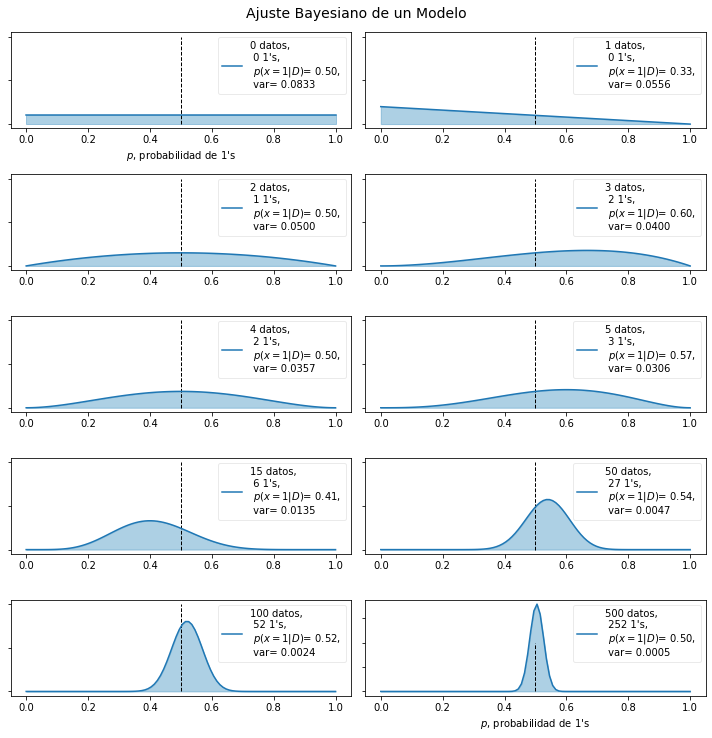

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10,10))

dist = stats.beta
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    ax = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probabilidad de 1's") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(ax.get_yticklabels(), visible=False)
    m = D[:N].sum()
    l=N-m
    a=1+m
    b=1+l
    mu=(a)/(a+b)
    var=a*b/((a+b)*(a+b)*(a+b+1))
    y = dist.pdf(x, a, b)
    plt.plot(x, y, label="%d datos,\n %d 1's, \n $p(x=1|D)$= %2.2f, \n var= %2.4f  " %(N, m, mu,var))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 10, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)


plt.suptitle("Ajuste Bayesiano de un Modelo",
             y=1.02,
             fontsize=14)

plt.tight_layout()

___

## Regresión Lineal Bayesiana

* Veamos ahora cómo funciona el aprendizaje Bayesiano en Regresión Lineal.
* Para abordar el problema de la regresión lineal desde un enfoque bayesiano, es necesario elegir un a priori conjugado de nuestra función de verosimilitud.
* Si vamos a modelar el _likelyhood_ de $\textrm{w}$ como una Gaussiana, podemos elegir un _prior conjugado_ también Gaussiano:

$$
p(\textrm{w})=\mathcal{N}(\mathbf{m}_0,\mathbf{S}_0)
$$
con promedio $\mathbf{m}_0$ y matriz de covarianza $\mathbf{S}_0$.
* El _posterior_ será una distribución Gaussiana proporcional al producto del _prior_ con el _likelyhood_ (20).
* Se puede demostrar (ver Bishop,C. 2006) que el _posterior_ se escribe:
$$
p(\textrm{w}|\mathbf{t})=\mathcal{N}(\textrm{w}|\mathbf{m}_N,\mathbf{S}_N)
$$
donde:
$$
\begin{array}
\;\mathbf{m}_N &=& \mathbf{S}_N(\mathbf{S}_0^{-1}\mathbf{m}_0+\beta\Phi^\textrm{T}\mathbf{t})\\
\mathbf{S}_{N}^{-1}&=& \mathbf{S}_0^{-1}+\beta\Phi^\textrm{T}\Phi
\end{array}
$$

* Si suponemos (como en el ejemplo de arriba) que los datos van llegando secuencialmente, podemos comenzar con un _prior_ muy amplio y centrado en $0$. Por tanto, el problema se puede simplificar si consideramos un _prior_ Gaussiano isotrópico centrado en $0$, con un sólo parámetro de precisión $\alpha^{-1}$ ($\alpha\to0$):

$$
p(\textrm{w}|\alpha)=\mathcal{N}(\textrm{w}|0,\alpha^{-1}I)
$$

* De esta forma los parámetros del _posterior_ Gaussiano correspondiente son:
$$
\begin{array}
\;\mathbf{m}_N &=& \beta\mathbf{S}_N\Phi^\textrm{T}\mathbf{t}\\
\mathbf{S}_{N}^{-1}&=& \alpha I+\beta\Phi^\textrm{T}\Phi
\end{array}
$$

* El $\log$ del _posterior_ está dado por la suma del $\log$ del _likelihood_ con el $\log$ del _prior_, por lo que:

$$
\ln p(\mathbf{t}|\textrm{w},\beta)=-\frac{\beta}{2}\sum_{n=1}^N \{t_n - \textrm{w}^\textrm{T}\phi(\textrm{x}_n)\}^2 -\frac{\alpha}{2}\textrm{w}^\textrm{T}\textrm{w} + \textrm{const}.
$$

* &#9758; **La maximización de la distribución a posteriori con respecto a $\textrm{w}$ es por lo tanto equivalente a la minimización de la suma de errores cuadráticos más un término de regularización cuadrática (L2) con $\lambda=\alpha/\beta$.**  

___

## Ilustración del Aprendizaje Bayesiano

### Datos sintéticos con ruido Gaussiano

In [2]:
import numpy as np

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

### Features Polinomiales

In [3]:
import itertools
import functools

class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()


### Modelo de Regresión Bayesiana

In [4]:
class BayesianRegression():
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y


### El siguiente programa ilustra el aprendizaje Bayesiano
* Suponemos un modelo lineal de la siguiente forma: $y(\textrm{x},\textrm{w})=w_0+w_1 x$.
* Tratándose de un modelo bidimensional, podemos graficarel las distribuciones a priori y posteriori de los parámetros $\textrm{w}$.
* Se generan datos sintéticos de la función $f(x, \textrm{a})=a_0+a_1 x$, donde $a_0=-0.3$ y $a_1=0.5$, eligiendo valores de $x_n$ de la distribución uniforme $U(x|-1,1)$, luego evaluando $f(\textrm{x}_n,\textrm{a})$ y agregando ruido gaussiano con $\sigma=0.2$ para obtener los datos $\textrm{t}$.
* El objetivo es estimar los valores de $a_0$ y $a_1$ de estos datos.
* Los supuestos son que se conocen los parámetros $\beta=(1/0.2)^2=25$ y $\alpha=0.2$.

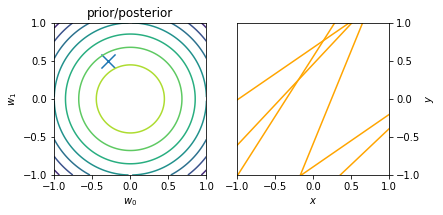

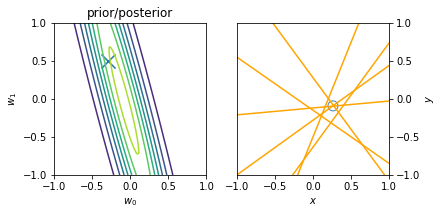

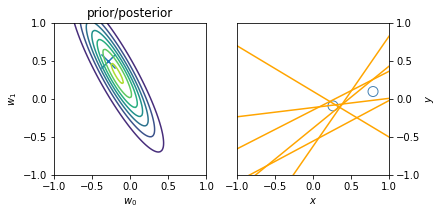

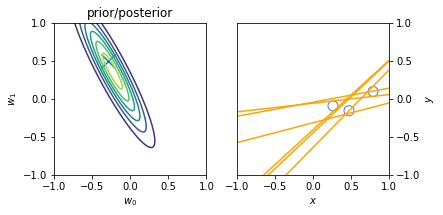

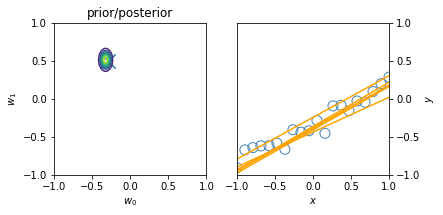

In [5]:
# from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

def linear(x):
    return -0.3 + 0.5 * x

x_train, y_train = create_toy_data(linear, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

feature = PolynomialFeature(degree=1)
X_train = feature.transform(x_train)
X = feature.transform(x)
model = BayesianRegression(alpha=0.2, beta=25.)

for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    model.fit(X_train[begin: end], y_train[begin: end])
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=model.w_mean, cov=model.w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    ax=plt.gca()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, model.predict(X, sample_size=6), c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("$x$")
    plt.ylabel("$y$")

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

___

## Regresión Logística (revisited)

### El caso general

* El modelo de Regresión Logística, es un modelo probabilista discriminativo, basado en la la función sigmoide actuando sobre un modelo lineal:

$$
\sigma(z)=\frac{1}{1+e^{-z}},\;\;\;\;\;\;\;\;\;\;z=\textrm{w}^\textrm{T}\textrm{x}
$$
* Su entrenamiento se realiza mediante el máximo de verosimilitud y descenso de gradiente.
* El modelo surge del planteamiento general de la forma del _posterior_ de la distribución de la clase $1$ para el caso de 2 clases ($K=2$):

$$
\begin{array}
\; p(\mathcal{C}_1|\textrm{x})&=&\frac{p(\textrm{x}|\mathcal{C}_1)p(\mathcal{C}_1)}{p(\textrm{x}|\mathcal{C}_1)p(\mathcal{C}_1)+p(\textrm{x}|\mathcal{C}_2)p(\mathcal{C}_2)}\hspace{4em}(31)\\
 &=& \frac{1}{1+\exp(-a)}=\sigma(a)
\end{array}
$$
  donde $a$ se define como:
$$
a=\ln\frac{p(\textrm{x}|\mathcal{C}_1)p(\mathcal{C}_1)}{p(\textrm{x}|\mathcal{C}_2)p(\mathcal{C}_2)}
$$
* Bajo este análisis general, el problema de aprendizaje Bayesiano consistiría en determinar la forma paramétrica del _prior_ $p(\mathcal{C}_k)$ y la distribución condicional de cada clase $p(\textrm{x}|\mathcal{C}_k)$, estimando los parámetros de manera Bayesiana. Si la _likelyhood_ $p(\textrm{x}|\mathcal{C}_k)$ fuera gaussiana, se podría hacer un cálculo similar al que se hizo arriba. 
* &#9758; **En este caso, podríamos contar con un modelo generativo.**
* Para el caso de $K>2$ clases, tenemos:

$$
\begin{array}
\; p(\mathcal{C}_k|\textrm{x}) &=& \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{\sum_j p(\textrm{x}|\mathcal{C}_j)p(\mathcal{C}_j)}\\
&=& \frac{\exp(a_k)}{\sum_j \exp(a_j)}\hspace{4em}(32)
\end{array}
$$
donde ahora 

$$
a_k=\ln p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)
$$
* La expresión (32) se conoce como la **función softmax** y puede verse como la generalización de la función logística sigmoide.
___

### El caso de la Regresión Logística

* La Regresión Logística es un caso de **modelo discriminativo**, en el que sólo nos interesa el _posterior_.
* En la Regresión logística, el _posterior_ (31) se define como: 

$$
p(\mathcal{C}_1|\phi)=y(\phi)=\sigma(\textrm{w}^\textrm{T}\phi)
$$
con $p(\mathcal{C}_2|\phi)=1-p(\mathcal{C}_1|\phi)$.
* &#9758; **NOTA** que cuando hablamos del **clasificador**, estamos diciendo que éste es **función de los datos** $(\phi)$, es decir que $\textrm{w}$ **está fijo**(el modelo ya fue entrenado) y $p(\mathcal{C}_1|\phi)=y(\phi)$ es el _posterior_.
* Para ajustar el modelo, se recurre a Máximo de Verosimilitud y descenso de gradiente.
* El problema del aprendizaje se podría formular de la misma forma que hicimos para la regresión lineal:

$$
p(\textrm{w}|t,\phi)\propto p(t|\textrm{w},\phi)p(\textrm{w}|\phi)
$$
* Sólo que ahora: $p(t|\textrm{w},\phi)=y(\phi)=\sigma(\textrm{w}^\textrm{T}\phi)$.
* &#9758; **NOTA** que ahora estamos hablando del **entrenamiento del modelo**, por lo que estamos diciendo que éste es **función de los parámetros** $(\textrm{w})$, es decir que $\textrm{w}$ es variable y $p(\mathcal{C}_1|\phi)=y(\phi)$ es el _likelyhood_.
* &#9758; **EN RESUMEN:** se podría decir que en realidad el entrenamiento está buscando maximizar directamente el _posterior_.
___
* En el caso de la Regresión Logística $t\in\{0,1\}$.
* Así, la función de costo se obtiene mediante el logaritmo de la función de verosimilitud siguiente:

$$
p(\mathbf{t}|\textrm{w})=\prod_{n=1}^N y_n^{t_n}(1-y_n)^{(1-t_n)}
$$

* De aqui, el error es:
$$
E(\textrm{w})=-\ln p(\mathbf{t}|\textrm{w})=-\sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\}\hspace{4em}(33)
$$
donde $\mathbf{t}=\{t_1,\ldots,t_N\}$ y $y_n=\sigma(a_n)$ y $a_n=\textrm{w}^\textrm{T}\phi_n$.
* Sabemos que la derivada de la función sigmoide se calcula:
$$
\frac{\textrm{d}\sigma}{\textrm{d}a}=\sigma(1-\sigma)
$$
* De aquí que el gradiente del error es:

$$
\nabla E(\textrm{w})=\sum_{n=1}^N(y_n-t_n)\phi_n
$$
* Nota la semejanza con (21).

* **A (33) se le conoce como la entropía binaria cruzada (_binary cross entropy_)** 